# Telecommunication Users Data
## by Sohila Akram


## Table of Contents
- [Introduction](#intro)
- [Cleaning](#cleaning)
- [Univariate Visualization](#Univariate)
- [Bivariate Visualization](#Bivariate)
- [Multivariate Visualization](#Multivariate)


<a id='intro'></a>
### Introduction

>Any Company aims to keep existing customers rather than attracting new ones. In this project we will analyze and visulaize which customers are more likely churn to help the telecom company keep them.

In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from matplotlib.ticker import FormatStrFormatter
from matplotlib_venn import venn2 , venn3 
%matplotlib inline

> Information of each column

* customerID - customer id
* gender - client gender (male / female)
* SeniorCitizen - is the client retired (1, 0)
* Partner - is the client married (Yes, No)
* tenure - how many months a person has been a client of the company
* PhoneService - is the telephone service connected (Yes, No)
* MultipleLines - are multiple phone lines connected (Yes, No, No phone service)
* InternetService - client's Internet service provider (DSL, Fiber optic, No)
* OnlineSecurity - is the online security service connected (Yes, No, No internet service)
* OnlineBackup - is the online backup service activated (Yes, No, No internet service)
* DeviceProtection - does the client have equipment insurance (Yes, No, No internet service)
* TechSupport - is the technical support service connected (Yes, No, No internet service)
* StreamingTV - is the streaming TV service connected (Yes, No, No internet service)
* StreamingMovies - is the streaming cinema service activated (Yes, No, No internet service)
* Contract - type of customer contract (Month-to-month, One year, Two year)
* PaperlessBilling - whether the client uses paperless billing (Yes, No)
* PaymentMethod - payment method (Electronic check, Mailed check, Bank transfer (automatic), Credit card (automatic))
* MonthlyCharges - current monthly payment
* TotalCharges - the total amount that the client paid for the services for the entire time
* Churn - whether there was a churn (Yes or No)

In [2]:
#loadig the dataset
df=pd.read_csv('telecom_users.csv')
df.head()

,Unnamed: 0,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,1869,7010-BRBUU,Male,0,Yes,Yes,72,Yes,Yes,No,...,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,4528,9688-YGXVR,Female,0,No,No,44,Yes,No,Fiber optic,...,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.2,No
2,6344,9286-DOJGF,Female,1,Yes,No,38,Yes,Yes,Fiber optic,...,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,6739,6994-KERXL,Male,0,No,No,4,Yes,No,DSL,...,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.5,No
4,432,2181-UAESM,Male,0,No,No,2,Yes,No,DSL,...,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.5,No


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5986 entries, 0 to 5985
Data columns (total 22 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   Unnamed: 0        5986 non-null   int64  
 1   customerID        5986 non-null   object 
 2   gender            5986 non-null   object 
 3   SeniorCitizen     5986 non-null   int64  
 4   Partner           5986 non-null   object 
 5   Dependents        5986 non-null   object 
 6   tenure            5986 non-null   int64  
 7   PhoneService      5986 non-null   object 
 8   MultipleLines     5986 non-null   object 
 9   InternetService   5986 non-null   object 
 10  OnlineSecurity    5986 non-null   object 
 11  OnlineBackup      5986 non-null   object 
 12  DeviceProtection  5986 non-null   object 
 13  TechSupport       5986 non-null   object 
 14  StreamingTV       5986 non-null   object 
 15  StreamingMovies   5986 non-null   object 
 16  Contract          5986 non-null   object 


<a id='cleaning'></a>

### Cleaning 

__Checking for dupliacted values__

In [4]:
df['customerID'].nunique()

5986

__Dropping unwated colums__

In [5]:
df.drop(columns=['Unnamed: 0' ,'customerID' ],inplace=True)

__Rename Columns with appropriate names__

In [6]:
df.rename(columns={'SeniorCitizen':'Retired' , 'Partner' : 'Married' , 'tenure':'Months'}, inplace=True);

__Changing Data types__

In [7]:
df['Retired']=df['Retired'].astype(object)

In [8]:
df.TotalCharges.value_counts()

20.2       10
           10
19.75       8
19.55       7
20.05       6
           ..
5643.4      1
4447.75     1
3551.65     1
6332.75     1
115.95      1
Name: TotalCharges, Length: 5611, dtype: int64

In [9]:
df.TotalCharges.replace(' ',np.NaN,inplace=True)
df['TotalCharges']=df.TotalCharges.astype(float);

__Checking Null vlues__

In [10]:
df.isnull().sum().sum()

10

In [11]:
#There are 10 null values, those customers didn't churn so we can safely drop them
df[df['TotalCharges'].isnull()].Churn

356     No
634     No
2771    No
3086    No
3255    No
4326    No
5375    No
5382    No
5695    No
5951    No
Name: Churn, dtype: object

In [12]:
df.dropna(inplace=True)

In [13]:
df.shape

(5976, 20)

In [14]:
df.head()

,gender,Retired,Married,Dependents,Months,PhoneService,MultipleLines,InternetService,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,Male,0,Yes,Yes,72,Yes,Yes,No,No internet service,No internet service,No internet service,No internet service,No internet service,No internet service,Two year,No,Credit card (automatic),24.10,1734.65,No
1,Female,0,No,No,44,Yes,No,Fiber optic,No,Yes,Yes,No,Yes,No,Month-to-month,Yes,Credit card (automatic),88.15,3973.20,No
2,Female,1,Yes,No,38,Yes,Yes,Fiber optic,No,No,No,No,No,No,Month-to-month,Yes,Bank transfer (automatic),74.95,2869.85,Yes
3,Male,0,No,No,4,Yes,No,DSL,No,No,No,No,No,Yes,Month-to-month,Yes,Electronic check,55.90,238.50,No
4,Male,0,No,No,2,Yes,No,DSL,Yes,No,Yes,No,No,No,Month-to-month,No,Electronic check,53.45,119.50,No


### What is the structure of your dataset?

> This dataset has 22 columns with 5986 entries. Most of the features are nominal, except for tenure, Monthly Charges and Total Charges that are numeric values.

### What is/are the main feature(s) of interest in your dataset?

> Churn is the main feature. we will analyze the effect of each other independent feature on churn.

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

> I think Contract, InternetService, TechSupport, TotalCharges, MonthlyCharges and tenure(how many months a person has been a client of the company) will have the most effect.

<a id='Univariate'></a>


## Univariate Exploration


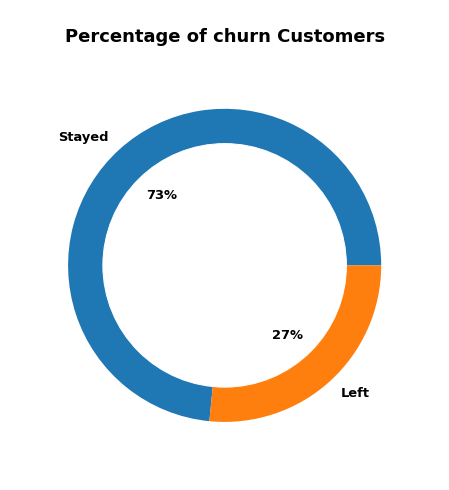

In [15]:
plt.subplots(figsize=(8,8));
plt.pie(df['Churn'].value_counts(), labels=['Stayed','Left'], textprops={'fontsize': 13 , 'fontweight' : 'bold' }, radius=.9  , autopct = "%1.0f%%");
plt.title('\nPercentage of churn Customers' ,fontsize=18,fontweight='bold' );
# add a circle at the center to transform it in a donut chart
my_circle=plt.Circle( (0,0), 0.7, color='white')
p=plt.gcf()
p.gca().add_artist(my_circle);

__Nearly 27% of customers churn, Let's figure out some reasons.__

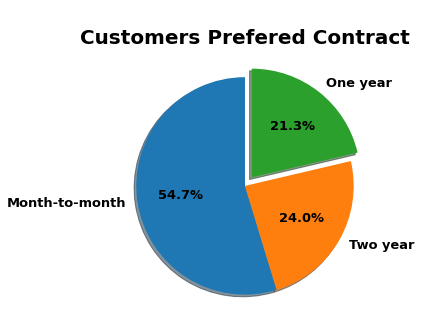

In [16]:
contracts=df['Contract'].value_counts()
explode = [0,0,0.1]
plt.subplots(figsize=(15,5))
plt.pie(contracts.values, labels = contracts.index, shadow = True, startangle = 90, autopct = "%1.1f%%",explode=explode, textprops={'fontsize': 13 , 'fontweight' : 'bold' })
plt.title('\nCustomers Prefered Contract' ,fontsize=20,fontweight='bold' );

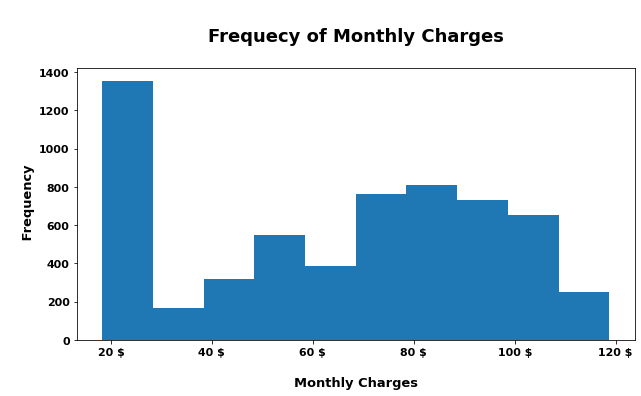

In [17]:
plt.subplots(figsize=(10,5))
plt.hist(df['MonthlyCharges']);
plt.title('\nFrequecy of Monthly Charges\n',fontsize=18,fontweight='bold');
plt.xticks( fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d $'))
plt.xlabel('\nMonthly Charges'  , fontsize=13 ,fontweight='bold');
plt.ylabel('\n Frequency' , fontsize=13 ,fontweight='bold');

In [18]:
df.MonthlyCharges.describe()

count    5976.000000
mean       64.846687
std        30.107576
min        18.250000
25%        35.750000
50%        70.425000
75%        89.900000
max       118.750000
Name: MonthlyCharges, dtype: float64

- __There are about 1300 customer that pays average 20 per month.__
- __Most customers tend to pay less than 90 per month.__ 
- __Only Few ones pay higher.__

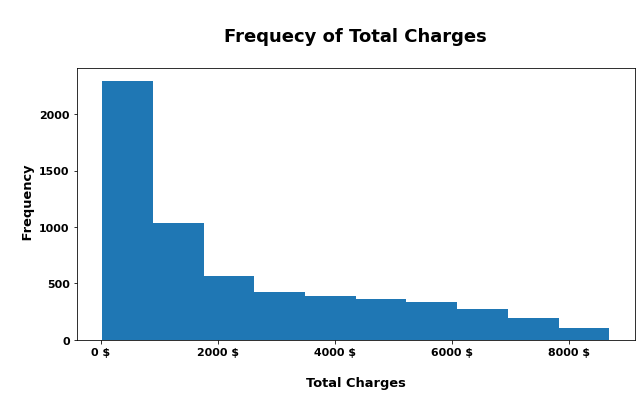

In [19]:
plt.subplots(figsize=(10,5))
plt.hist(df['TotalCharges']);
plt.title('\nFrequecy of Total Charges\n',fontsize=18,fontweight='bold');
plt.xticks( fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d $'))
plt.xlabel('\nTotal Charges'  , fontsize=13 ,fontweight='bold');
plt.ylabel('\n Frequency' , fontsize=13 ,fontweight='bold');

- __This Right skewed histogram clarifies the fact that the higher total charges the less customers.                           
    Let's see the relation between customers churn and total charges to know the reason for this loss.__

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?

> No, There wasn't any unusual points

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?

> Total Charges needed some cleaning as was documented.

<a id='Bivariate'></a>

## Bivariate Exploration

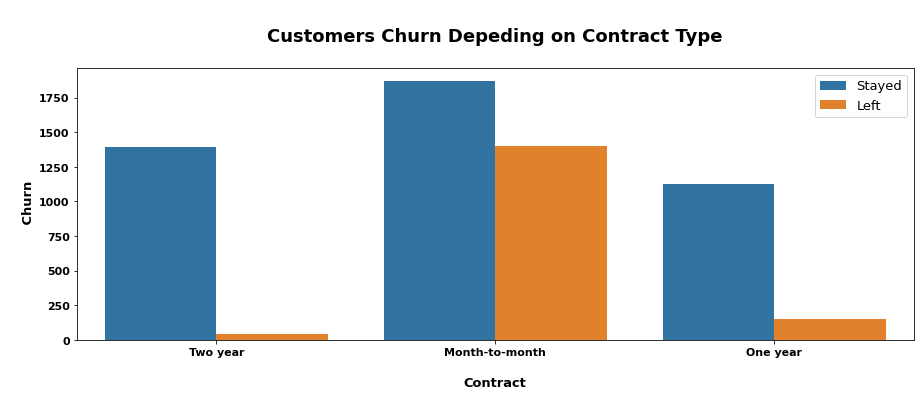

In [20]:
plt.subplots(figsize=(15,5))
sb.countplot(data=df,x='Contract', hue='Churn');
plt.title('\nCustomers Churn Depeding on Contract Type\n',fontsize=18,fontweight='bold');
plt.xticks( fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.xlabel('\nContract'  , fontsize=13 ,fontweight='bold');
plt.ylabel('\n Churn' , fontsize=13 ,fontweight='bold');
plt.legend(['Stayed' , 'Left'], prop={'size': 13});

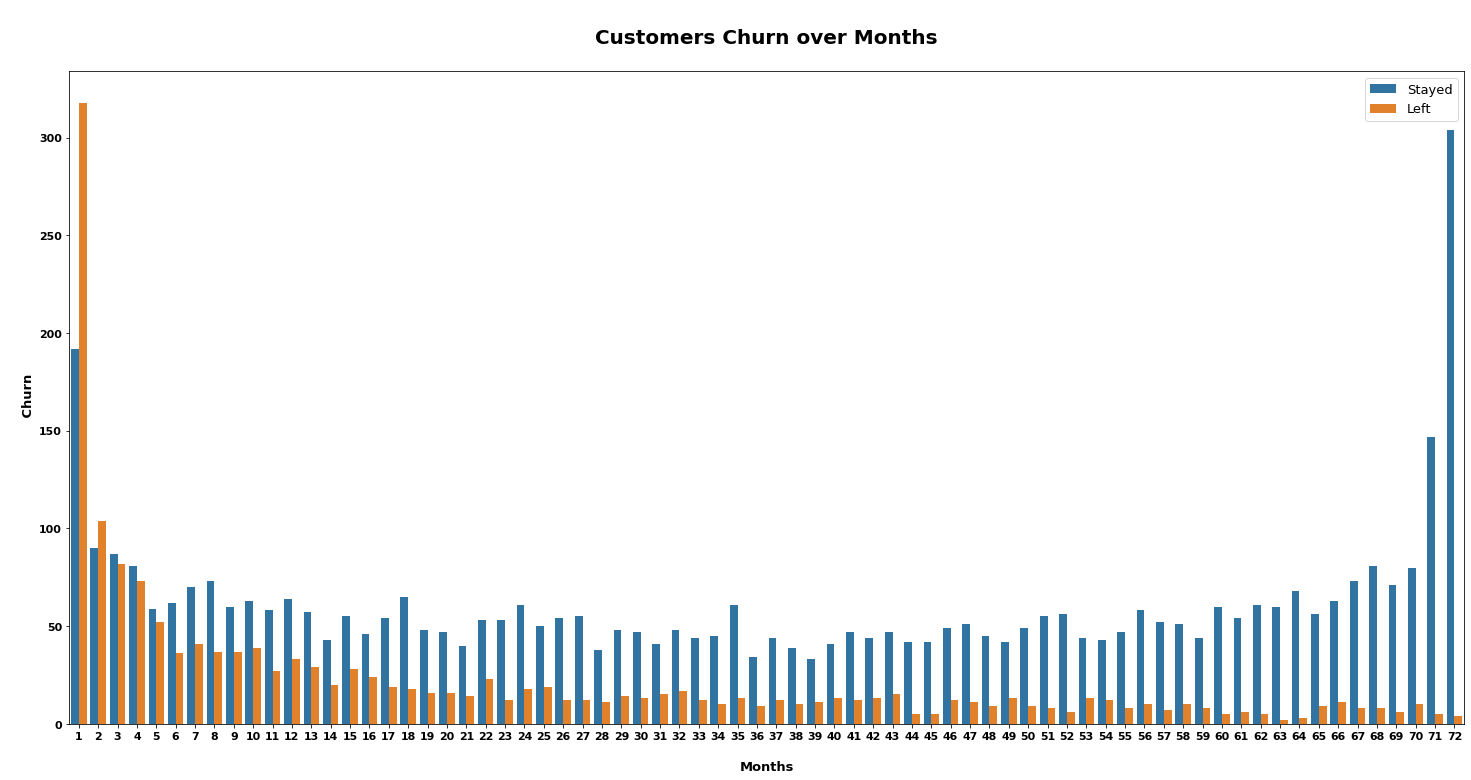

In [21]:
plt.subplots(figsize=(25,12))
sb.countplot(data=df,hue='Churn', x='Months');
plt.title('\nCustomers Churn over Months\n',fontsize=20,fontweight='bold');
plt.xticks( fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.ylabel('\n Churn' , fontsize=13 ,fontweight='bold');
plt.xlabel('\nMonths'  , fontsize=13 ,fontweight='bold');
plt.legend(['Stayed' , 'Left'], prop={'size': 13});

- __Month-to-month contract customers churn the most, but one/two year contract didn't easily which was excpected.__
- __Alot of customers leave after only one month. (Maybe due to high charges)__
- __I think it is good to convince more customers of long-term contracts.__
- __The company should take care of new customers and provide them with offers to keep them existing and get thier loyality.__

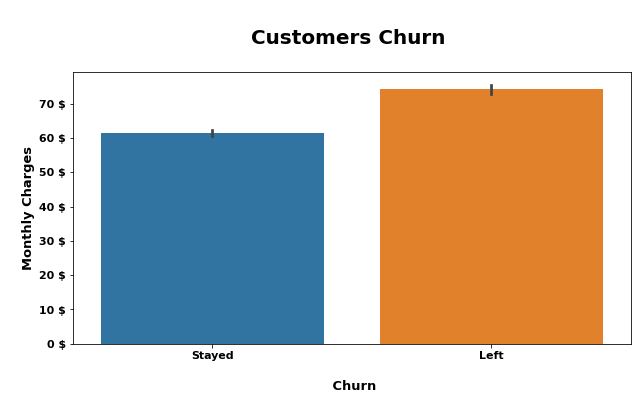

In [22]:
plt.subplots(figsize=(10,5))
sb.barplot(x='Churn', y='MonthlyCharges', data=df);
xticks=([0,1],['Left','Stayed'])
plt.title('\nCustomers Churn \n',fontsize=20,fontweight='bold');
plt.xticks([0,1],['Stayed','Left'], fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d $'))
plt.xlabel('\n Churn' , fontsize=13 ,fontweight='bold');
plt.ylabel('\nMonthly Charges'  , fontsize=13 ,fontweight='bold');

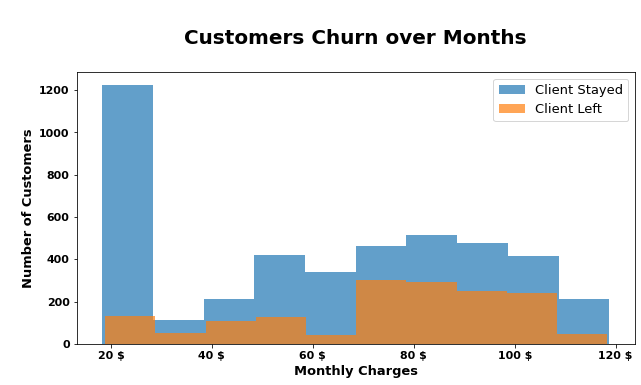

In [23]:
plt.subplots(figsize=(10,5))
plt.hist(df.query('Churn == "No"')['MonthlyCharges'],  label = 'Client Stayed', alpha = 0.7)
plt.hist(df.query('Churn == "Yes"')['MonthlyCharges'],  label = 'Client Left', alpha = 0.7)
plt.xlabel('Monthly Charges', fontsize=13 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.title('\nCustomers Churn over Months\n',fontsize=20,fontweight='bold');
plt.xticks( fontsize=11 ,fontweight='bold');
plt.gca().xaxis.set_major_formatter(FormatStrFormatter('%d $'))
plt.ylabel('\nNumber of Customers'  , fontsize=13 ,fontweight='bold');
plt.legend( prop={'size': 13});

- __Customers left paid higher monthly charges.__
- __Customers with nearly 20 dollar Monthly Charge are more likely to stay.__
- __There should be more care about low-price packages.__

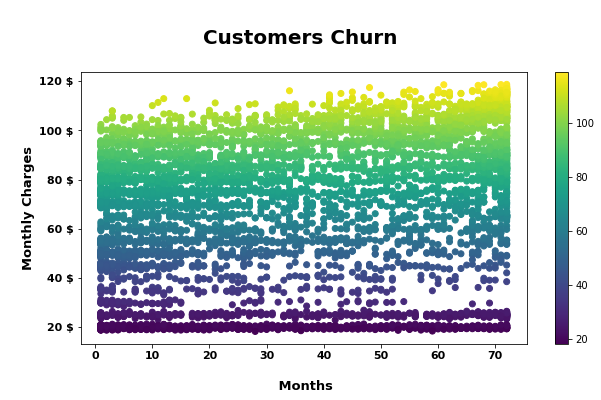

In [24]:
plt.subplots(figsize=(10,5))
plt.scatter(x=df['Months'],y=df['MonthlyCharges'],c=df['MonthlyCharges']);
plt.colorbar();
plt.title('\nCustomers Churn \n',fontsize=20,fontweight='bold');
plt.xticks(fontsize=11 ,fontweight='bold');
plt.yticks( fontsize=11 ,fontweight='bold');
plt.xlabel('\n Months' , fontsize=13 ,fontweight='bold');
plt.ylabel('\nMonthly Charges'  , fontsize=13 ,fontweight='bold');
plt.gca().yaxis.set_major_formatter(FormatStrFormatter('%d $'))

- __Monthly Charges remains the same over months! Customers rarley change their packages.__

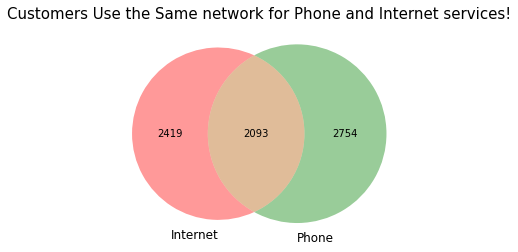

In [25]:
groupA=df[df['InternetService']!='No'].Married.value_counts().values.tolist()[0]
groupB=df[df['PhoneService']=='Yes'].Married.value_counts().values.tolist()[0]
groupC=df[(df['PhoneService']=='Yes') & (df['InternetService']!='No')].Married.value_counts().values.tolist()[0]
venn2(subsets = (groupA,groupB,groupC ), set_labels = ('Internet', 'Phone'));
plt.title('Customers Use the Same network for Phone and Internet services!',fontsize=15);

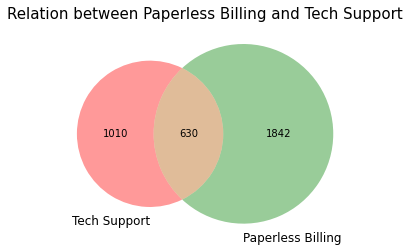

In [26]:
groupA=df[df['TechSupport']=='Yes'].Married.value_counts().values.tolist()[0]
groupB=df[df['PaperlessBilling']=='Yes'].Married.value_counts().values.tolist()[0]
groupC=df[(df['PaperlessBilling']=='Yes') & (df['TechSupport']=='Yes')].Married.value_counts().values.tolist()[0]
venn2(subsets = (groupA,groupB,groupC ), set_labels = ('Tech Support', 'Paperless Billing'));
plt.title('Relation between Paperless Billing and Tech Support',fontsize=15);

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?

> There was a strong relation between charges and the desicion of a customer to churn. It turns out that less charges gurantee customer satisfication. Also there was an inversely proportional relation between long term contracts and churn rate.

### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?

> Yes,Most Internet Users are Phone Users on the same network.                                                                 
> 62% of Customer that have available Tech Support go for Paperless Billing.

<a id='Multivariate'></a>


## Multivariate Exploration


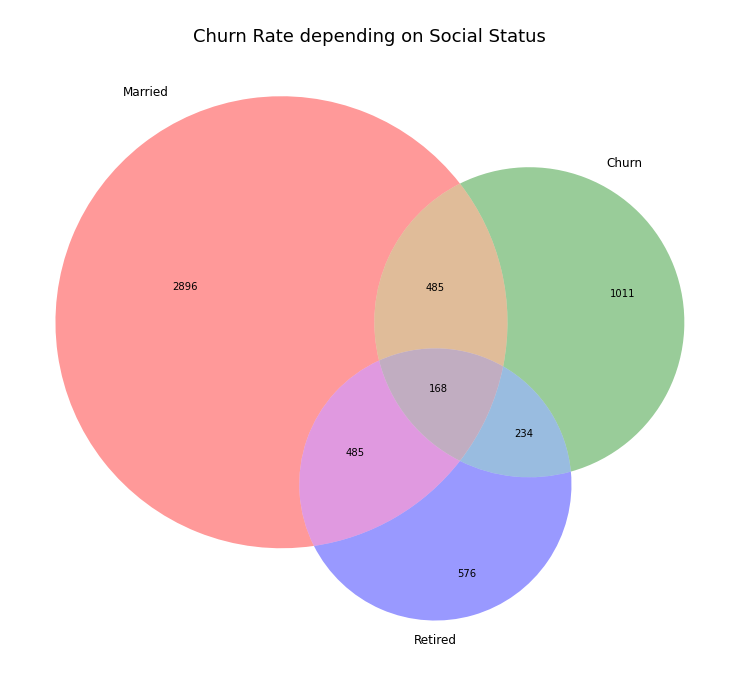

In [27]:
groupA=df[df['Married']=='Yes'].Married.value_counts().values.tolist()[0]
groupB=df[df['Churn']=='Yes'].Married.value_counts().values.tolist()[0]
groupC=df[(df['Married']=='Yes') & (df['Churn']=='Yes')].Married.value_counts().values.tolist()[0]
groupD=df[df['Retired']==1].Married.value_counts().values.tolist()[0]
groupE=df[(df['Married']=='Yes') & (df['Retired']==1)].Married.value_counts().values.tolist()[0]
groupF=df[(df['Retired']==1) & (df['Churn']=='Yes')].Married.value_counts().values.tolist()[0]
groupG=df[(df['Retired']==1) & (df['Churn']=='Yes') & (df['Married']=='Yes')].Married.value_counts().values.tolist()[0]
plt.subplots(figsize=(13,12))
plt.title('\nChurn Rate depending on Social Status',fontsize=18);

venn3(subsets = (groupA,groupB,groupD,groupC,groupE,groupF,groupG ), set_labels = ('Married', 'Churn','Retired'));

- __20% of Married Customers Churn.__
- __48% of Retired Customers Churn.__

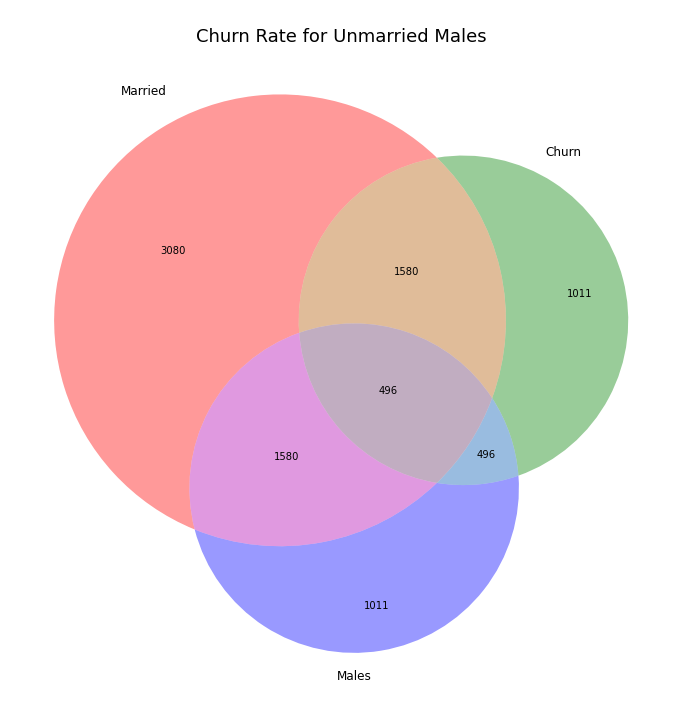

In [28]:
groupA=df[df['Married']=='No'].Married.value_counts().values.tolist()[0]
groupB=df[df['Churn']=='Yes'].Married.value_counts().values.tolist()[0]
groupC=df[(df['Married']=='No') & (df['Churn']=='Yes')].Married.value_counts().values.tolist()[0]
groupD=df[df['gender']=='Male'].Married.value_counts().values.tolist()[0]
groupE=df[(df['Married']=='No') & (df['gender']=='Male')].Married.value_counts().values.tolist()[0]
groupF=df[(df['gender']=='Male') & (df['Churn']=='Yes')].Married.value_counts().values.tolist()[0]
groupG=df[(df['gender']=='Male') & (df['Churn']=='Yes') & (df['Married']=='No')].Married.value_counts().values.tolist()[0]
plt.subplots(figsize=(13,12))
plt.title('\nChurn Rate for Unmarried Males',fontsize=18);

venn3(subsets = (groupA,groupB,groupD,groupC,groupE,groupF,groupG ), set_labels = ('Married', 'Churn','Males'));

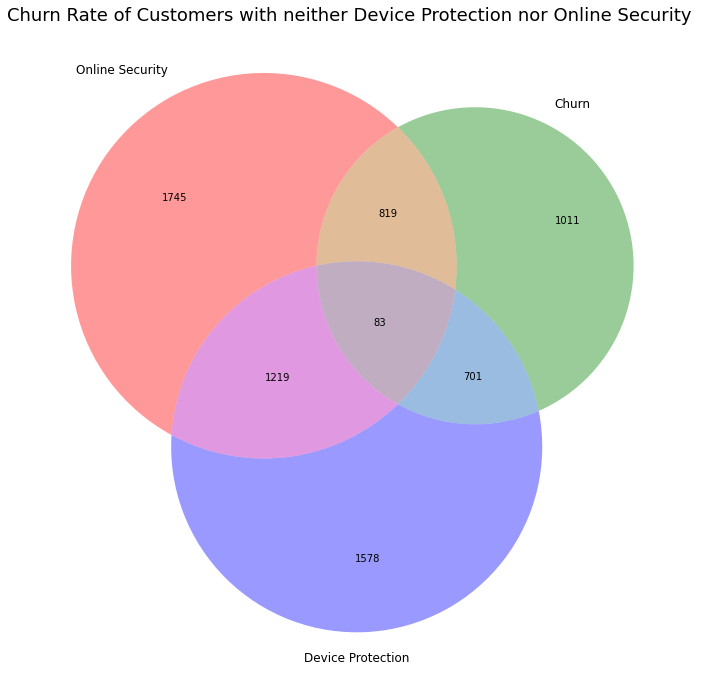

In [29]:
groupA2=df[df['OnlineSecurity']=='No'].Married.value_counts().values.tolist()[0]
groupB2=df[df['Churn']=='Yes'].Married.value_counts().values.tolist()[0]
groupD2=df[(df['OnlineSecurity']=='No') & (df['Churn']=='Yes')].Married.value_counts().values.tolist()[0]
groupC2=df[df['DeviceProtection']=='No'].Married.value_counts().values.tolist()[0]
groupE2=df[(df['OnlineSecurity']=='No') & (df['DeviceProtection']=='No')].Married.value_counts().values.tolist()[0]
groupF2=df[(df['Churn']=='Yes') & (df['DeviceProtection']=='No')].Married.value_counts().values.tolist()[0]
groupG2=df[(df['Churn']=='Yes') & (df['DeviceProtection']=='No') & (df['OnlineSecurity']=='Yes')].Married.value_counts().values.tolist()[0]
plt.subplots(figsize=(13,12))
plt.title('Churn Rate of Customers with neither Device Protection nor Online Security ',fontsize=18)
venn3(subsets = (groupA2,groupB2,groupD2,groupC2,groupE2,groupF2,groupG2 ), set_labels = ('Online Security', 'Churn' , 'Device Protection'));

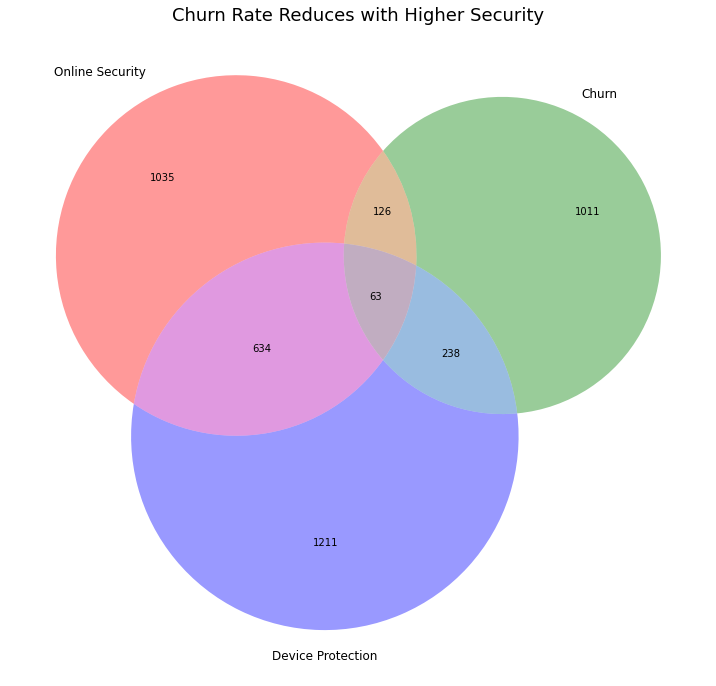

In [30]:
groupA=df[df['OnlineSecurity']=='Yes'].Married.value_counts().values.tolist()[0]
groupB=df[df['Churn']=='Yes'].Married.value_counts().values.tolist()[0]
groupD=df[(df['OnlineSecurity']=='Yes') & (df['Churn']=='Yes')].Married.value_counts().values.tolist()[0]
groupC=df[df['DeviceProtection']=='Yes'].Married.value_counts().values.tolist()[0]
groupE=df[(df['OnlineSecurity']=='Yes') & (df['DeviceProtection']=='Yes')].Married.value_counts().values.tolist()[0]
groupF=df[(df['Churn']=='Yes') & (df['DeviceProtection']=='Yes')].Married.value_counts().values.tolist()[0]
groupG=df[(df['Churn']=='Yes') & (df['DeviceProtection']=='Yes') & (df['OnlineSecurity']=='Yes')].Married.value_counts().values.tolist()[0]
plt.subplots(figsize=(13,12))
plt.title('Churn Rate Reduces with Higher Security',fontsize=18)
venn3(subsets = (groupA,groupB,groupD,groupC,groupE,groupF,groupG ), set_labels = ('Online Security', 'Churn' , 'Device Protection'));

- __Online Security indicates that customers will churn with less rates.__

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?

> This part shows strong relationships between different features that together affect the main feature of interest like protection,security and social status.

### Were there any interesting or surprising interactions between features?

> As excpected, Availability of One Service has a big effect on another one.